In [ ]:
import pandas as pd
import os

folder_path = '/content/drive/MyDrive/NIFTY 50'


all_data = pd.DataFrame()

for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv') or file_name.endswith('.CSV'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        df['Label'] = os.path.splitext(file_name)[0]


        all_data = all_data.append(df, ignore_index=True)


print(all_data)


<ipython-input-2-5e5852cef5d5>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)
<ipython-input-2-5e5852cef5d5>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)
<ipython-input-2-5e5852cef5d5>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)
<ipython-input-2-5e5852cef5d5>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)
<ipython-input-2-5e5852cef5d5>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas 

              Date        Open        High         Low       Close  \
0       02-07-2002    1.386372    1.390971    1.356484    1.373344   
1       03-07-2002    1.371811    1.387139    1.364914    1.373344   
2       04-07-2002    1.379475    1.401700    1.379475    1.381008   
3       05-07-2002    1.388672    1.388672    1.372578    1.377942   
4       08-07-2002    1.394803    1.454580    1.364914    1.438486   
...            ...         ...         ...         ...         ...   
240815  19-06-2023  382.000000  382.000000  377.100006  380.149994   
240816  20-06-2023  381.799988  384.950012  380.600006  382.500000   
240817  21-06-2023  384.250000  387.250000  383.100006  385.500000   
240818  22-06-2023  386.000000  386.000000  381.600006  382.299988   
240819  23-06-2023  382.299988  383.000000  378.100006  379.950012   

         Adj Close     Volume         VWAP              Label  Price  
0        -0.010540  1016147.0  1.373599667  ADANI_ENTERPRISES    NaN  
1        -0.01054

<ipython-input-2-5e5852cef5d5>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)


In [ ]:
# !pip install --upgrade scikit-learn


In [ ]:
df = all_data

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,Label,Price
0,02-07-2002,1.386372,1.390971,1.356484,1.373344,-0.010540,1016147.0,1.373599667,ADANI_ENTERPRISES,NaN
1,03-07-2002,1.371811,1.387139,1.364914,1.373344,-0.010540,980394.0,1.375132333,ADANI_ENTERPRISES,NaN
2,04-07-2002,1.379475,1.401700,1.379475,1.381008,-0.010599,972747.0,1.387394333,ADANI_ENTERPRISES,NaN
3,05-07-2002,1.388672,1.388672,1.372578,1.377942,-0.010575,974496.0,1.379730667,ADANI_ENTERPRISES,NaN
4,08-07-2002,1.394803,1.454580,1.364914,1.438486,-0.011040,1061686.0,1.419326667,ADANI_ENTERPRISES,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240820 entries, 0 to 240819
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       238884 non-null  object 
 1   Open       238485 non-null  float64
 2   High       238485 non-null  float64
 3   Low        238485 non-null  float64
 4   Close      238485 non-null  float64
 5   Adj Close  234628 non-null  float64
 6   Volume     234628 non-null  float64
 7   VWAP       238884 non-null  object 
 8   Label      240820 non-null  object 
 9   Price      1378 non-null    float64
dtypes: float64(7), object(3)
memory usage: 18.4+ MB


In [ ]:
df['VWAP'] = pd.to_numeric(df['VWAP'], errors='coerce')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-8-b9c6864122be>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.shape

(240820, 10)

In [ ]:
240820-5823

234997

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'VWAP',
       'Label', 'Price'],
      dtype='object')

In [ ]:
df.isnull().sum()

Date           1936
Open           2335
High           2335
Low            2335
Close          2335
Adj Close      6192
Volume         6192
VWAP           2335
Label             0
Price        239442
dtype: int64

In [ ]:
# Filter the DataFrame to get labels with non-null prices
non_null_labels = df.loc[df['Price'].notnull(), 'Label'].unique()

# Display the result
print("Labels with non-null prices:", non_null_labels)

Labels with non-null prices: ['HDFC_LIFE']


In [ ]:
df['Label'].value_counts()

WIPRO                        5873
BRITANNIA                    5873
HINDALCO                     5873
INFOSYS                      5873
HINDUSTAN UNILEVER           5873
HDFC_BANK                    5873
ITC                          5873
TATA MOTORS                  5873
TATA CONSUMER PRODUCTS       5873
SBI_BANK                     5873
RELIANCE                     5873
BHARAT PETROLEUM             5873
CIPLA                        5873
SUN_PHARMA                   5873
TATA STEEL                   5873
AXIS_BANK                    5873
ONGC                         5873
TITAN                        5873
EICHER MOTOTRS               5873
NIFTY_50_STOCKS              5823
KOTAK_MAHINDRA               5482
APOLLO HOSPITALS             5222
ADANI_ENTERPRISES            5222
GRASIM                       5222
ICICI_BANK                   5222
ASIAN PAINTS                 5222
BAJAJ AUTO                   5222
HERO MOTOCORP                5222
BHARTI_AIRTEL                5222
BAJAJ_FINANCE 

In [ ]:
df = df.drop(['Price'], axis=1)

In [ ]:
df.isnull().sum()

Date         1936
Open         2335
High         2335
Low          2335
Close        2335
Adj Close    6192
Volume       6192
VWAP         2335
Label           0
dtype: int64

In [ ]:
selected_feature =  ['Volume', 'High', 'Low', 'Open', 'Close', 'Adj Close', 'VWAP']
df.groupby('Label')[selected_feature].apply(lambda x: x.isnull().sum())

,Volume,High,Low,Open,Close,Adj Close,VWAP
Label,,,,,,,
ADANI_ENTERPRISES,8,8,8,8,8,8,8
ADANI_PORTS,7,7,7,7,7,7,7
APOLLO HOSPITALS,10,10,10,10,10,10,10
ASIAN PAINTS,10,10,10,10,10,10,10
AXIS_BANK,10,10,10,10,10,10,10
BAJAJ AUTO,7,7,7,7,7,7,7
BAJAJ_FINANCE,10,10,10,10,10,10,10
BAJAJ_FINSERV,11,11,11,11,11,11,11
BHARAT PETROLEUM,10,10,10,10,10,10,10


In [ ]:
stock = 'NIFTY_50_STOCKS'
df.drop(df[df['Label'] == stock].index, inplace=True)

In [ ]:
df.shape

(234997, 9)

In [ ]:
df.groupby('Label')[selected_feature].apply(lambda x: x.isnull().sum())

,Volume,High,Low,Open,Close,Adj Close,VWAP
Label,,,,,,,
ADANI_ENTERPRISES,8,8,8,8,8,8,8
ADANI_PORTS,7,7,7,7,7,7,7
APOLLO HOSPITALS,10,10,10,10,10,10,10
ASIAN PAINTS,10,10,10,10,10,10,10
AXIS_BANK,10,10,10,10,10,10,10
BAJAJ AUTO,7,7,7,7,7,7,7
BAJAJ_FINANCE,10,10,10,10,10,10,10
BAJAJ_FINSERV,11,11,11,11,11,11,11
BHARAT PETROLEUM,10,10,10,10,10,10,10


In [ ]:
features =  ['Volume', 'High', 'Low', 'Open', 'Close', 'Adj Close', 'VWAP']
for feature in features:
    df[feature] = df[feature].fillna(df.groupby('Label')[feature].transform('median'))

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
VWAP         0
Label        0
dtype: int64

In [ ]:
df.head(6000)

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,Label
0,2002-02-07,1.386372,1.390971,1.356484,1.373344,-0.010540,1016147.0,1.373600,ADANI_ENTERPRISES
1,2002-03-07,1.371811,1.387139,1.364914,1.373344,-0.010540,980394.0,1.375132,ADANI_ENTERPRISES
2,2002-04-07,1.379475,1.401700,1.379475,1.381008,-0.010599,972747.0,1.387394,ADANI_ENTERPRISES
3,2002-05-07,1.388672,1.388672,1.372578,1.377942,-0.010575,974496.0,1.379731,ADANI_ENTERPRISES
4,2002-08-07,1.394803,1.454580,1.364914,1.438486,-0.011040,1061686.0,1.419327,ADANI_ENTERPRISES
...,...,...,...,...,...,...,...,...,...
5995,2005-06-23,165.100006,165.975006,164.000000,164.925003,146.056915,72698.0,164.966670,APOLLO HOSPITALS
5996,2005-06-24,165.425003,171.250000,165.425003,169.425003,150.042084,358372.0,168.700002,APOLLO HOSPITALS
5997,2005-06-27,169.000000,172.500000,169.000000,170.850006,151.304062,194156.0,170.783335,APOLLO HOSPITALS
5998,2005-06-28,171.000000,171.725006,168.625000,169.475006,150.086334,168006.0,169.941671,APOLLO HOSPITALS


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234997 entries, 0 to 240819
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       234997 non-null  datetime64[ns]
 1   Open       234997 non-null  float64       
 2   High       234997 non-null  float64       
 3   Low        234997 non-null  float64       
 4   Close      234997 non-null  float64       
 5   Adj Close  234997 non-null  float64       
 6   Volume     234997 non-null  float64       
 7   VWAP       234997 non-null  float64       
 8   Label      234997 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 17.9+ MB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,VWAP
count,234997.000000,234997.000000,234997.000000,234997.000000,234997.000000,2.349970e+05,234997.000000
mean,775.016037,784.679353,764.564127,774.389840,720.026717,7.396985e+06,774.544235
std,1651.370011,1668.666676,1632.285234,1650.140993,1593.801404,1.736038e+07,1650.319365
min,0.858340,0.928846,0.858340,0.919650,-0.011040,0.000000e+00,0.909431
25%,93.699997,95.500000,91.730003,93.500000,74.114037,5.928040e+05,93.551254
50%,252.500000,256.633331,248.454544,252.199997,214.608337,2.349067e+06,252.353333
75%,695.000000,705.000000,684.549988,694.544983,647.610413,7.104836e+06,694.991679
max,23025.000000,23175.250000,22877.300780,22968.550780,22968.550780,6.428460e+08,23007.033850


<ipython-input-26-990044b8609e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skewness_values.index, y=skewness_values.values, palette='viridis')


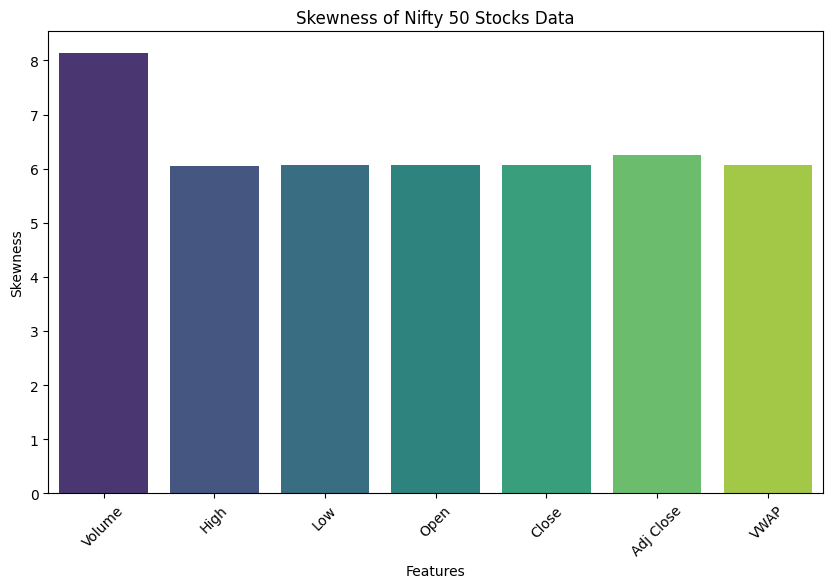

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for which you want to visualize skewness
selected_columns = ['Volume', 'High', 'Low', 'Open', 'Close', 'Adj Close', 'VWAP']

# Create a new DataFrame with selected columns
selected_data = df[selected_columns]

# Calculate skewness for each column
skewness_values = selected_data.skew()

# Visualize skewness using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness_values.index, y=skewness_values.values, palette='viridis')
plt.title('Skewness of Nifty 50 Stocks Data')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234997 entries, 0 to 240819
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       234997 non-null  datetime64[ns]
 1   Open       234997 non-null  float64       
 2   High       234997 non-null  float64       
 3   Low        234997 non-null  float64       
 4   Close      234997 non-null  float64       
 5   Adj Close  234997 non-null  float64       
 6   Volume     234997 non-null  float64       
 7   VWAP       234997 non-null  float64       
 8   Label      234997 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 17.9+ MB


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# numerical_col = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'VWAP']

# # Calculate the number of rows and columns for subplots
# num_cols = 2
# num_rows = (len(numerical_col) + num_cols - 1) // num_cols

# # Create subplots
# fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# # Flatten the axis array for easy iteration
# axs = axs.flatten()

# # Iterate over each numerical column
# for i, col in enumerate(numerical_col):
#     # Plot histogram
#     sns.histplot(df[col], ax=axs[i], kde=True)
#     axs[i].set_title(f"Distribution of {col}")
#     axs[i].set_xlabel(col)
#     axs[i].set_ylabel("Frequency")

# # Remove empty subplots if any
# for j in range(i+1, len(axs)):
#     fig.delaxes(axs[j])

# # Adjust layout
# plt.tight_layout()
# plt.show()



In [ ]:
df_temp = df.copy()

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234997 entries, 0 to 240819
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       234997 non-null  datetime64[ns]
 1   Open       234997 non-null  float64       
 2   High       234997 non-null  float64       
 3   Low        234997 non-null  float64       
 4   Close      234997 non-null  float64       
 5   Adj Close  234997 non-null  float64       
 6   Volume     234997 non-null  float64       
 7   VWAP       234997 non-null  float64       
 8   Label      234997 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 17.9+ MB


#applying capping method to handle outliers in the dataset and saving it in another dataset

In [ ]:
import pandas as pd

# Define the capping method function
def handle_outliers(data):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Calculate upper and lower caps
    upper_cap = Q3 + 1.5 * IQR
    lower_cap = Q1 - 1.5 * IQR

    # Replace outliers with caps
    data_capped = data.apply(lambda x: min(max(x, lower_cap), upper_cap))

    return data_capped

# Assuming df is your DataFrame containing features and 'Label' column
# Replace 'df' with the actual name of your DataFrame
# Replace 'Label' with the actual name of your label column

# List of numerical features
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'VWAP']

# Group by 'Label' and handle outliers for each feature
for feature in numerical_features:
    df_temp[feature] = df_temp.groupby('Label', group_keys=False)[feature].transform(handle_outliers)

# Check the DataFrame after handling outliers
# print(df)


#counting the number of outlier in the dataset before capping method

In [ ]:
import pandas as pd

# Define the capping method function
def count_outliers(data):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Calculate upper and lower caps
    upper_cap = Q3 + 1.5 * IQR
    lower_cap = Q1 - 1.5 * IQR

    # Create a boolean mask to identify outliers
    outlier_mask = (data < lower_cap) | (data > upper_cap)

    return outlier_mask


# List of numerical features
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'VWAP']

# Group by 'Label' and count outliers for each feature
outlier_counts = df.groupby('Label', group_keys=False)[numerical_features].apply(count_outliers).sum()

# Display the number of outliers for each feature within each label
print("Number of outliers for each feature within each label:")
print(outlier_counts)


Number of outliers for each feature within each label:
Open         11955
High         12044
Low          11957
Close        11966
Adj Close    13689
Volume       17037
VWAP         12014
dtype: int64


#counting outlier in the dataset after capping method

In [ ]:
# List of numerical features
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'VWAP']

# Group by 'Label' and count outliers for each feature
outlier_counts = df_temp.groupby('Label', group_keys=False)[numerical_features].apply(count_outliers).sum()

# Display the number of outliers for each feature within each label
print("Number of outliers for each feature within each label:")
print(outlier_counts)


Number of outliers for each feature within each label:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
VWAP         0
dtype: int64


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'VWAP']


# for feature in numerical_features:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x='Label', y=feature, data=df)
#     plt.title(f"Box Plot of {feature} with respect to Labels")
#     plt.xlabel('Label')
#     plt.ylabel(feature)
#     plt.xticks(rotation=90)
#     plt.show()


In [ ]:

# numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'VWAP']

# for feature in numerical_features:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x='Label', y=feature, data=df_temp)
#     plt.title(f"Box Plot of {feature} with respect to Labels")
#     plt.xlabel('Label')
#     plt.ylabel(feature)
#     plt.xticks(rotation=90)
#     plt.show()


In [ ]:
# numerical_col = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'VWAP']


# num_cols = 2
# num_rows = (len(numerical_col) + num_cols - 1) // num_cols


# fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))


# axs = axs.flatten()


# for i, col in enumerate(numerical_col):

#     sns.histplot(df_temp[col], ax=axs[i], kde=True)
#     axs[i].set_title(f"Distribution of {col}")
#     axs[i].set_xlabel(col)
#     axs[i].set_ylabel("Frequency")


# for j in range(i+1, len(axs)):
#     fig.delaxes(axs[j])


# plt.tight_layout()
# plt.show()



In [ ]:
df_temp = df_temp.sort_values(by=['Label', 'Date'], ascending=[False, True])
df_temp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,Label
234968,2000-01-02,149.812500,154.102509,148.500000,154.102509,125.711433,1326666.0,152.235006,WIPRO
234989,2000-01-03,267.300018,267.978760,251.250015,267.915009,218.555695,3351546.0,262.381261,WIPRO
235032,2000-01-05,126.813759,126.813759,126.813759,126.813759,103.450233,0.0,126.813759,WIPRO
235055,2000-01-06,68.812500,68.812500,65.250000,65.876251,53.745152,5482959.0,66.646250,WIPRO
235098,2000-01-08,91.125008,93.000008,89.555626,90.101257,73.509117,7632826.0,90.885630,WIPRO


In [ ]:
df['Label'].unique()

array(['ADANI_ENTERPRISES', 'APOLLO HOSPITALS', 'ADANI_PORTS',
       'ASIAN PAINTS', 'AXIS_BANK', 'DIVIS LAB', 'BAJAJ AUTO', 'CIPLA',
       'BHARAT PETROLEUM', 'BAJAJ_FINSERV', 'BRITANNIA', 'BAJAJ_FINANCE',
       'COAL INDIA', 'BHARTI_AIRTEL', 'HERO MOTOCORP', 'INDUS INDUSTRIES',
       'ICICI_BANK', 'HDFC_BANK', 'HINDUSTAN UNILEVER', 'GRASIM',
       'HINDALCO', 'EICHER MOTOTRS', 'HCL_TECHNOLOIES', 'HDFC_LIFE',
       'NESTLE', 'INFOSYS', 'KOTAK_MAHINDRA', 'NTPC', 'JSW STEEL',
       'MARUTI SUZUKI', 'ITC', 'TATA MOTORS', 'SBI_LIFE', 'POWERGRID',
       'TATA CONSUMER PRODUCTS', 'SBI_BANK', 'RELIANCE', 'SUN_PHARMA',
       'TATA CONSULTANCY SERVICES', 'TATA STEEL', 'ONGC', 'TECH_MAHINDRA',
       'ULTRATECH CEMENT', 'TITAN', 'UPL', 'WIPRO'], dtype=object)

In [ ]:
for stock in df['Label'].unique():
  df_stock = df_temp[df_temp['Label'] == stock]
  print()
  print(f'stock: {stock}')
  print(df_stock.head())



stock: ADANI_ENTERPRISES
         Date      Open      High       Low     Close  Adj Close     Volume  \
22 2002-01-08  1.226200  1.260687  1.226200  1.233097  -0.009464   953331.0   
65 2002-01-10  0.984025  1.072925  0.984025  1.042270   0.031913   517996.0   
88 2002-01-11  1.050700  1.062962  1.030774  1.046102   0.032031   489668.0   
0  2002-02-07  1.386372  1.390971  1.356484  1.373344  -0.010540  1016147.0   
23 2002-02-08  1.226200  1.226200  1.200910  1.220835  -0.009369   939461.0   

        VWAP              Label  
22  1.239995  ADANI_ENTERPRISES  
65  1.033073  ADANI_ENTERPRISES  
88  1.046613  ADANI_ENTERPRISES  
0   1.373600  ADANI_ENTERPRISES  
23  1.215982  ADANI_ENTERPRISES  

stock: APOLLO HOSPITALS
           Date       Open       High        Low      Close  Adj Close  \
5244 2002-01-08  52.474998  52.500000  49.000000  49.625000  41.263393   
5287 2002-01-10  49.500000  50.224998  48.075001  49.174999  41.974968   
5310 2002-01-11  49.900002  49.900002  49.049999

In [ ]:
std_deviation = df_temp.groupby('Label')['Close'].transform('std').rename('Close_std')


df_temp['Close_std'] = std_deviation
df_temp.head(7000)


,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,Label,Close_std
234968,2000-01-02,149.812500,154.102509,148.500000,154.102509,125.711433,1326666.0,152.235006,WIPRO,103.017791
234989,2000-01-03,267.300018,267.978760,251.250015,267.915009,218.555695,3351546.0,262.381261,WIPRO,103.017791
235032,2000-01-05,126.813759,126.813759,126.813759,126.813759,103.450233,0.0,126.813759,WIPRO,103.017791
235055,2000-01-06,68.812500,68.812500,65.250000,65.876251,53.745152,5482959.0,66.646250,WIPRO,103.017791
235098,2000-01-08,91.125008,93.000008,89.555626,90.101257,73.509117,7632826.0,90.885630,WIPRO,103.017791
...,...,...,...,...,...,...,...,...,...,...
232263,2012-03-08,79.699997,80.466667,79.699997,79.933334,71.210434,319443.0,80.033333,UPL,240.145671
232282,2012-03-09,80.633331,81.300003,79.133331,79.599998,70.913467,970527.0,80.011111,UPL,240.145671
232303,2012-03-10,88.133331,90.000000,87.333336,88.366669,78.723465,966184.0,88.566668,UPL,240.145671
232342,2012-03-12,79.333336,84.500000,79.333336,83.533333,74.417580,6227168.5,82.455556,UPL,240.145671


In [ ]:
def get_last_value(group):
    return group.iloc[-1]

# Calculate the most recent value of standard deviation for each stock
most_recent_std = df_temp.groupby('Label')['Close_std'].transform(get_last_value)

# Create a new column 'std' containing the most recent standard deviation value
df_temp['std'] = most_recent_std
df_temp.head(10000)

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,Label,Close_std,std
234968,2000-01-02,149.812500,154.102509,148.500000,154.102509,125.711433,1326666.0,152.235006,WIPRO,103.017791,103.017791
234989,2000-01-03,267.300018,267.978760,251.250015,267.915009,218.555695,3351546.0,262.381261,WIPRO,103.017791,103.017791
235032,2000-01-05,126.813759,126.813759,126.813759,126.813759,103.450233,0.0,126.813759,WIPRO,103.017791,103.017791
235055,2000-01-06,68.812500,68.812500,65.250000,65.876251,53.745152,5482959.0,66.646250,WIPRO,103.017791,103.017791
235098,2000-01-08,91.125008,93.000008,89.555626,90.101257,73.509117,7632826.0,90.885630,WIPRO,103.017791,103.017791
...,...,...,...,...,...,...,...,...,...,...,...
220178,2003-05-30,385.000000,389.500000,360.000000,385.950012,356.470154,76000.0,378.483337,ULTRATECH CEMENT,2099.822796,2099.822796
220074,2003-06-01,310.000000,312.500000,307.000000,308.899994,285.305450,47500.0,309.466665,ULTRATECH CEMENT,2099.822796,2099.822796
220097,2003-06-02,335.000000,338.000000,331.149994,335.750000,310.104584,140100.0,334.966665,ULTRATECH CEMENT,2099.822796,2099.822796
220117,2003-06-03,342.000000,342.899994,338.500000,339.950012,313.983765,62500.0,340.450002,ULTRATECH CEMENT,2099.822796,2099.822796


In [ ]:
df_temp.describe()

,Open,High,Low,Close,Adj Close,Volume,VWAP,Close_std,std
count,234997.000000,234997.000000,234997.000000,234997.000000,234997.000000,2.349970e+05,234997.000000,234997.000000,234997.000000
mean,747.680532,756.955665,737.559769,747.094754,688.714098,6.628683e+06,747.123694,675.331854,675.331854
std,1604.780226,1620.901038,1585.965326,1603.379877,1520.002133,1.407063e+07,1602.908085,1014.172547,1014.172547
min,0.858340,0.928846,0.858340,0.919650,-0.011040,0.000000e+00,0.909431,26.147645,26.147645
25%,93.699997,97.000000,91.730003,93.872281,74.714531,5.926580e+05,94.983634,138.313625,138.313625
50%,249.800003,253.449997,245.500000,249.300003,213.950378,2.293340e+06,249.348338,324.524064,324.524064
75%,657.450012,666.750000,646.275024,656.599976,599.607666,6.805921e+06,656.800008,855.946218,855.946218
max,19076.206634,19188.081634,18870.675018,19052.268341,17492.841660,1.683776e+08,19003.070852,6123.541081,6123.541081


In [ ]:
df_temp_sorted = df_temp.sort_values(by='std', ascending=True)
df_temp_sorted['Label'].unique()[:15]

array(['TATA STEEL', 'NTPC', 'POWERGRID', 'ONGC', 'ADANI_ENTERPRISES',
       'COAL INDIA', 'HINDALCO', 'HDFC_LIFE', 'WIPRO', 'ITC',
       'TATA CONSUMER PRODUCTS', 'BHARTI_AIRTEL', 'SBI_BANK',
       'BHARAT PETROLEUM', 'JSW STEEL'], dtype=object)

In [ ]:
stable_stocks = df_temp_sorted['Label'].unique()[:20]


sum_std = 0
for stock in stable_stocks:

    std_value = df_temp_sorted[df_temp_sorted['Label'] == stock]['std'].iloc[0]
    sum_std += std_value

average_std = sum_std / len(stable_stocks)

print("Average of 'std' for the first 15 stable stocks:", average_std)


Average of 'std' for the first 15 stable stocks: 120.09494359877706


In [ ]:
df = df_temp_sorted

In [ ]:
threshold = average_std
df['Stability'] = df['std'].apply(lambda x: 'Unstable' if x>threshold else 'Stable')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,Label,Close_std,std,Stability
206883,2010-02-22,54.115440,55.296833,54.020168,54.567989,17.821241,60442820.0,54.628330,TATA STEEL,26.147645,26.147645,Stable
207564,2012-11-15,36.670834,36.670834,35.641876,35.765732,12.465469,35377237.0,36.026147,TATA STEEL,26.147645,26.147645,Stable
207581,2012-11-12,38.361938,38.385757,37.413967,37.737900,13.152832,32269620.0,37.845875,TATA STEEL,26.147645,26.147645,Stable
207562,2012-11-11,38.862146,39.529041,38.228558,38.797718,13.500521,54617522.5,38.834193,TATA STEEL,26.147645,26.147645,Stable
207542,2012-11-10,39.481407,40.195957,39.081257,40.038757,13.954751,62983312.0,39.771990,TATA STEEL,26.147645,26.147645,Stable


In [ ]:
df['Stability'].value_counts()

Unstable    181551
Stable       53446
Name: Stability, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Stability'] = encoder.fit_transform(df['Stability'])

df['Stability'].value_counts()

1    181551
0     53446
Name: Stability, dtype: int64

#**Final dataset for dimensionality reduction**

In [ ]:
df.head(120059)

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP,Label,Close_std,std,Stability
206883,2010-02-22,54.115440,55.296833,54.020168,54.567989,17.821241,60442820.0,54.628330,TATA STEEL,26.147645,26.147645,0
207564,2012-11-15,36.670834,36.670834,35.641876,35.765732,12.465469,35377237.0,36.026147,TATA STEEL,26.147645,26.147645,0
207581,2012-11-12,38.361938,38.385757,37.413967,37.737900,13.152832,32269620.0,37.845875,TATA STEEL,26.147645,26.147645,0
207562,2012-11-11,38.862146,39.529041,38.228558,38.797718,13.500521,54617522.5,38.834193,TATA STEEL,26.147645,26.147645,0
207542,2012-11-10,39.481407,40.195957,39.081257,40.038757,13.954751,62983312.0,39.771990,TATA STEEL,26.147645,26.147645,0
...,...,...,...,...,...,...,...,...,...,...,...,...
132233,2021-05-07,1193.731285,1207.312470,1178.964463,1193.065651,1000.402950,4058338.0,1193.352079,INFOSYS,343.331185,343.331185,1
132191,2021-05-05,1193.731285,1207.312470,1178.964463,1193.065651,1000.402950,3939788.0,1193.352079,INFOSYS,343.331185,343.331185,1
132171,2021-05-04,1193.731285,1207.312470,1178.964463,1193.065651,1000.402950,9479572.0,1193.352079,INFOSYS,343.331185,343.331185,1
132153,2021-05-03,1193.731285,1207.312470,1178.964463,1193.065651,1000.402950,6486176.0,1193.352079,INFOSYS,343.331185,343.331185,1


In [ ]:
df = df.drop(['Adj Close','Volume','VWAP','std','Stability', 'Close_std'], axis=1)
df.head()

,Date,Open,High,Low,Close,Label
206883,2010-02-22,54.115440,55.296833,54.020168,54.567989,TATA STEEL
207564,2012-11-15,36.670834,36.670834,35.641876,35.765732,TATA STEEL
207581,2012-11-12,38.361938,38.385757,37.413967,37.737900,TATA STEEL
207562,2012-11-11,38.862146,39.529041,38.228558,38.797718,TATA STEEL
207542,2012-11-10,39.481407,40.195957,39.081257,40.038757,TATA STEEL


In [ ]:
df.describe()

,Open,High,Low,Close
count,234997.000000,234997.000000,234997.000000,234997.000000
mean,747.680532,756.955665,737.559769,747.094754
std,1604.780226,1620.901038,1585.965326,1603.379877
min,0.858340,0.928846,0.858340,0.919650
25%,93.699997,97.000000,91.730003,93.872281
50%,249.800003,253.449997,245.500000,249.300003
75%,657.450012,666.750000,646.275024,656.599976
max,19076.206634,19188.081634,18870.675018,19052.268341


In [ ]:
df = df.sort_values(by=['Label' ,'Date'], ascending=[False, True])
df.head()
df.to_csv('stockdata.csv', index=False)

In [ ]:
df.value_counts()

Date        Open          High          Low           Close         Label             
2000-01-02  4.910000      5.280000      4.910000      5.140000      EICHER MOTOTRS        1
2016-07-14  774.650024    774.650024    766.849976    768.549988    SUN_PHARMA            1
            861.984985    872.219971    857.500000    867.015015    BAJAJ_FINANCE         1
            927.000000    935.000000    922.049988    932.950012    HINDUSTAN UNILEVER    1
            1010.200012   1025.500000   1009.000000   1017.599976   ASIAN PAINTS          1
                                                                                         ..
2009-04-20  312.915192    319.296539    305.914093    315.945190    BHARTI_AIRTEL         1
            332.500000    344.899994    321.524994    324.149994    BAJAJ AUTO            1
            425.962311    434.555847    418.111725    424.823090    RELIANCE              1
            527.049988    527.049988    527.049988    527.049988    NESTLE           

In [ ]:
df.to_csv('/content/drive/MyDrive/Stockdata', index=False)

In [ ]:
df.groupby('Label')['Date']

In [ ]:
df_tem = df['Label']
df_tem['Row count'] = df['Label'].value_counts()
df_tem.to_csv('Rowcount.csv', index=False)

<ipython-input-81-c8f2de9c4daa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tem['Row count'] = df['Label'].value_counts()


In [ ]:
# Create a DataFrame with unique values from 'Label' column and their row counts
df_t = df['Label'].value_counts().reset_index()
df_t.columns = ['Label', 'Row count']

df_t.head()


,Label,Row count
0,WIPRO,5873
1,RELIANCE,5873
2,HINDUSTAN UNILEVER,5873
3,EICHER MOTOTRS,5873
4,INFOSYS,5873


In [ ]:
df_t.to_csv('Rowcount.csv', index=False)

In [ ]:
df_temp.to_csv('rowcount.csv', index=False)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Label
234968,2000-01-02,149.812500,154.102509,148.500000,154.102509,WIPRO
234989,2000-01-03,267.300018,267.978760,251.250015,267.915009,WIPRO
235032,2000-01-05,126.813759,126.813759,126.813759,126.813759,WIPRO
235055,2000-01-06,68.812500,68.812500,65.250000,65.876251,WIPRO
235098,2000-01-08,91.125008,93.000008,89.555626,90.101257,WIPRO


In [ ]:
# correlate = df[['Open','Close']].corr
# plt.figure(figsize=(8,10))
# sns.heatmap(correlate,annot=True,cmap='coolwarm')
# plt.title("Correlation between Open and close price")
# plt.show()

In [ ]:
# correlation_matrix = df[['Open','High','Low','Close']].corr()

# # Step 4: Plot the heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

Taking target variable and features

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
y.shape

(234997, 5)


(234997,)

Splitting the data in trian and test

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (187997, 5)
Shape of x_test: (47000, 5)
Shape of y_train: (187997,)
Shape of y_test: (47000,)


**Models importing**

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Model building and training**

In [ ]:
model_RandomForestClassifier = RandomForestClassifier()
model_RandomForestClassifier.fit(x_train, y_train)
prediction = model_RandomForestClassifier.predict(x_test)
acc = accuracy_score(y_test, prediction)
report = classification_report(y_test, prediction)
print(f"accuracy: {acc}")
print(report)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>)

In [ ]:
con_mat = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8,10))
sns.heatmap(con_mat, annot = True, cmap = 'Blues')
plt.title('Confusion Matrix-Random Forest classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model_KNeighborsClassifier = KNeighborsClassifier()
model_KNeighborsClassifier.fit(x_train, y_train)
prediction = model_KNeighborsClassifier.predict(x_test)
acc = accuracy_score(y_test, prediction)
report = classification_report(y_test, prediction)
print(f"accuracy: {acc}")
print(report)

In [ ]:
con_mat = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8,10))
sns.heatmap(con_mat, annot = True, cmap = 'Blues')
plt.title('Confusion Matrix-KNN classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model_DecisionTreeClassifier = DecisionTreeClassifier()
model_DecisionTreeClassifier.fit(x_train, y_train)
prediction = model_DecisionTreeClassifier.predict(x_test)
acc = accuracy_score(y_test, prediction)
report = classification_report(y_test, prediction)
print(f"accuracy: {acc}")
print(report)

In [ ]:
con_mat = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8,10))
sns.heatmap(con_mat, annot = True, cmap = 'Blues')
plt.title('Confusion Matrix-Decision tree classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model_logisticRegression = LogisticRegressionCV()
model_logisticRegression.fit(x_train, y_train)
prediction = model_logisticRegression.predict(x_test)
acc = accuracy_score(y_test, prediction)
report = classification_report(y_test, prediction)
print(f"accuracy: {acc}")
print(report)

In [ ]:
confus_mt = confusion_matrix(y_test, prediction)
plt.figure(figsize=(10,8))
sns.heatmap(confus_mt, annot=True, cmap='Blues')
plt.title('Confusion Matrix-Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import pickle
filename = 'nifty50_model.pkl'
saved_model = pickle.dump(model_RandomForestClassifier, open(filename, 'wb'))

In [ ]:
load_model = pickle.load(open('nifty50_model.pkl', 'rb'))

In [ ]:
import numpy as np
sample = [594.750000,	594.750000, 585.049988,	593.000000,	489.003723,	5302564.0,	590.933329,	343.331185]
sample_arr = np.asarray(sample)
sample_arr = sample_arr.reshape(1,-1)
prediction = load_model.predict(sample_arr)
print(prediction)
if(prediction[0] == 0):
    print('Stable Stock')
else:
  print("Unstable stock")


In [ ]:
import zipfile
from google.colab import files
df.to_csv('Nifty50.csv', index=False)
zip_filename = 'dataframe.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write('Nifty50.csv', arcname='Nifty50.csv')

files.download(zip_filename)